In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [99]:
df = pd.read_excel('summary_2016.xlsx', index_col=0)
df = df.T

In [100]:
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1990,111.092122,35.054100,63.491486,51.477171,362.964725,65.761628,41.281125,16.622253,4.496176,190.539594,...,11.994798,105.487149,561.051471,54.679616,5.549996,96.110438,66.970985,104.139817,86.609521,57.304947
1991,115.466992,35.685200,64.398631,50.380231,350.440893,67.488680,40.447643,17.436569,4.437397,191.723436,...,11.665106,100.908182,556.139806,53.557148,5.737109,97.386574,67.941064,96.391085,88.942221,55.587763
1992,122.726107,37.298110,67.532477,52.232946,356.370525,68.753603,40.933364,16.363305,4.428866,194.961723,...,11.825055,106.814856,557.391378,55.360633,6.229845,98.962376,74.767489,98.402548,88.415815,61.594442
1993,127.038855,36.969789,69.649832,51.171105,344.135973,72.287113,38.755864,17.760964,4.592788,197.536826,...,12.477445,117.474291,573.051429,57.032862,6.268014,102.969757,71.541950,99.339064,91.372193,58.497367
1994,125.120631,36.825473,72.475134,55.153835,360.699934,72.781082,38.056651,17.119763,4.560771,205.172755,...,13.133744,112.132861,573.856524,58.146258,6.094173,101.888547,75.888643,107.038016,94.651653,60.765104


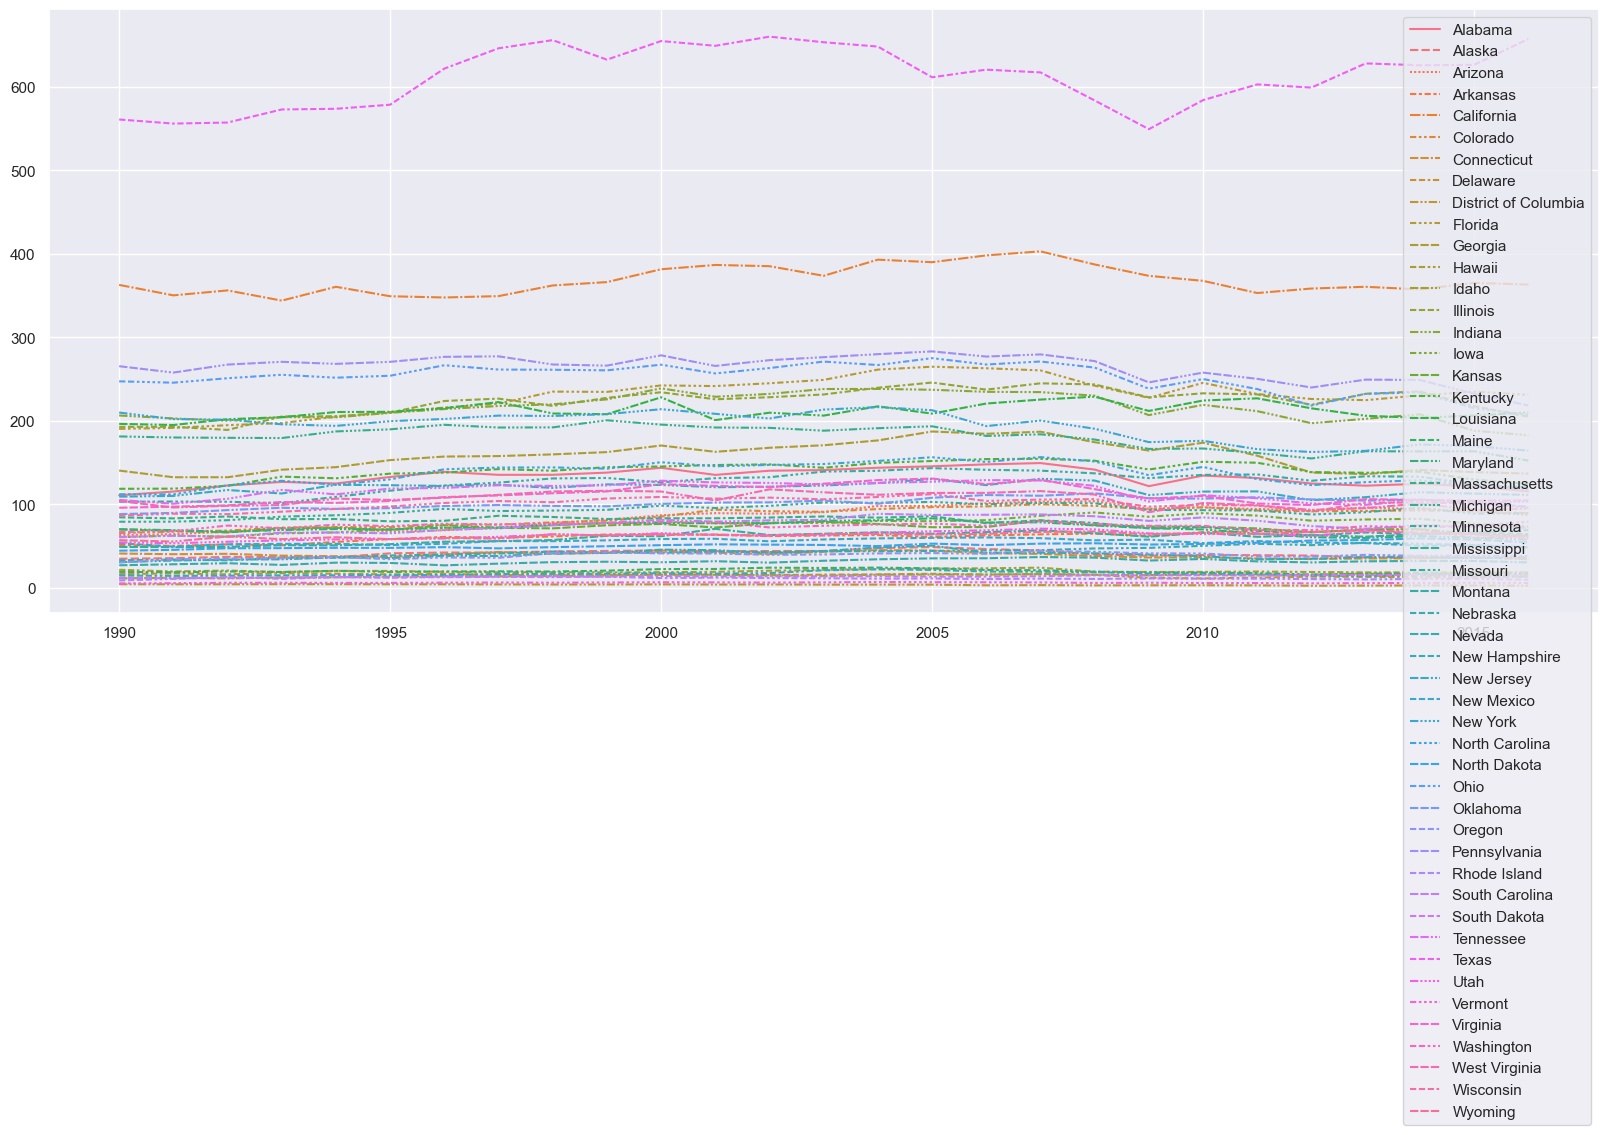

In [101]:
plt.figure(figsize=(20, 8), dpi=100)
sns.lineplot(data=df)
plt.show()

In [102]:
states = df.columns
states

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import r2_score

In [104]:
model = RF(n_estimators=10)

In [105]:
ans = pd.DataFrame(columns=df.columns, index=range(2016, 2055))

In [108]:
for i in states:
    data = df.loc[:, i]
    X = data.index.to_numpy()
    y = data.values
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=0)
    model.fit(xtrain.reshape(-1, 1), ytrain)
    y_pred = model.predict(xtest.reshape(-1, 1))
    r2 = r2_score(y_true=ytest.reshape(-1, 1), y_pred=y_pred)

    new_x = np.arange(2016, 2055).reshape(-1, 1)
    # print(new_x.shape)
    new_y = model.predict(new_x)
    ans[i] = new_y
    # print(new_y)
    # ans['r2'] = r2
    # print(r2)

In [109]:
ans.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,r2
2016,118.449003,35.633864,89.123381,62.205749,364.376437,90.885648,35.269002,13.308666,2.828153,231.980408,...,102.917671,641.949053,60.779871,6.070251,103.683752,76.83537,94.529034,96.885973,62.596011,0.370214
2017,118.449003,35.633864,89.123381,62.205749,364.376437,90.885648,35.269002,13.308666,2.828153,231.980408,...,102.917671,641.949053,60.779871,6.070251,103.683752,76.83537,94.529034,96.885973,62.596011,0.370214
2018,118.449003,35.633864,89.123381,62.205749,364.376437,90.885648,35.269002,13.308666,2.828153,231.980408,...,102.917671,641.949053,60.779871,6.070251,103.683752,76.83537,94.529034,96.885973,62.596011,0.370214
2019,118.449003,35.633864,89.123381,62.205749,364.376437,90.885648,35.269002,13.308666,2.828153,231.980408,...,102.917671,641.949053,60.779871,6.070251,103.683752,76.83537,94.529034,96.885973,62.596011,0.370214
2020,118.449003,35.633864,89.123381,62.205749,364.376437,90.885648,35.269002,13.308666,2.828153,231.980408,...,102.917671,641.949053,60.779871,6.070251,103.683752,76.83537,94.529034,96.885973,62.596011,0.370214
